In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import filtered_data.csv for plotting
north_american_df = pd.read_csv('filtered_data.csv')

north_american_df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Canada,1990,819.7796,1678.9061,3656.9629,1368.721873,36099.1500,118.0,12569.1112,-67909.0539,...,6842.7669,0.0,0.0,11979.5170,6485207.0,21207473.0,13710916.0,13946288.0,208955.122034,-0.012167
1,Canada,1991,819.7796,1678.9061,3525.1421,1368.721873,36099.1500,192.0,12156.9016,-67909.0539,...,6720.0932,0.0,0.0,11950.2670,6556875.0,21487731.0,13888241.0,14127520.0,207579.704034,0.556833
2,Canada,1992,819.7796,1678.9061,3309.5379,1368.721873,36099.1500,177.0,12393.0067,-67909.0539,...,6850.7476,0.0,0.0,12514.2853,6560417.0,21823933.0,14046660.0,14300980.0,208544.758434,0.029583
3,Canada,1993,819.7796,1678.9061,3371.2605,1368.721873,36094.9409,278.0,12432.7161,-67909.0539,...,6819.2560,0.0,0.0,12970.3824,6560045.0,22151258.0,14197751.0,14470416.0,209307.532534,0.515500
4,Canada,1994,819.7796,1678.9061,3065.1988,1368.721873,36092.8796,257.0,13019.9448,-67909.0539,...,6791.0268,0.0,0.0,13048.3151,6555733.0,22470455.0,14347961.0,14633228.0,212940.929289,0.536583


In [27]:
north_american_df.keys()

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

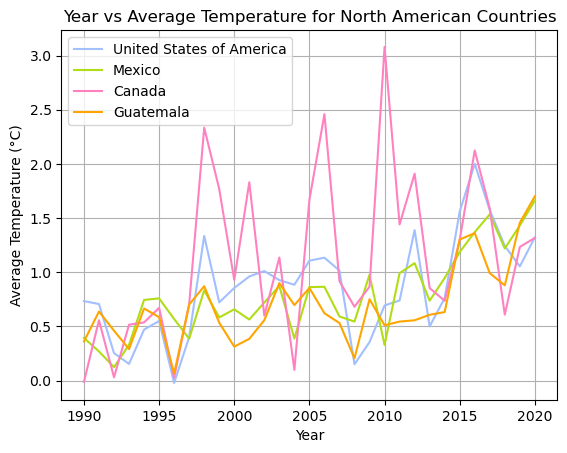

In [55]:
# Define a color map for the countries
colors = {"United States of America": "xkcd:pastel blue", "Mexico": "xkcd:yellowish green", "Canada": "xkcd:pink", "Guatemala": "orange"}

# Plotting data for each country
for country, color in colors.items():
    country_data = north_american_df[north_american_df['Area'] == country]
    plt.plot(country_data['Year'], country_data['Average Temperature °C'], label=country, color=color)

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Year vs Average Temperature for North American Countries')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

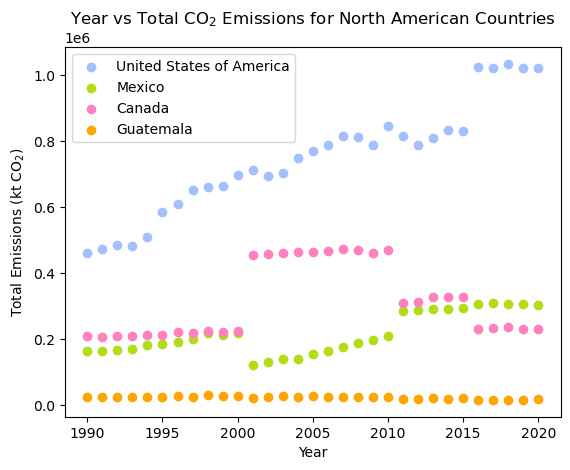

In [32]:
colors = {"United States of America": "xkcd:pastel blue", "Mexico": "xkcd:yellowish green", "Canada": "xkcd:pink", "Guatemala": "orange"}

# Plotting data for each country
for country, color in colors.items():
    country_data = north_american_df[north_american_df['Area'] == country]
    plt.scatter(country_data['Year'], country_data['total_emission'], label=country, color=color)

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO$_2$)')
plt.title('Year vs Total CO$_2$ Emissions for North American Countries')
plt.legend()

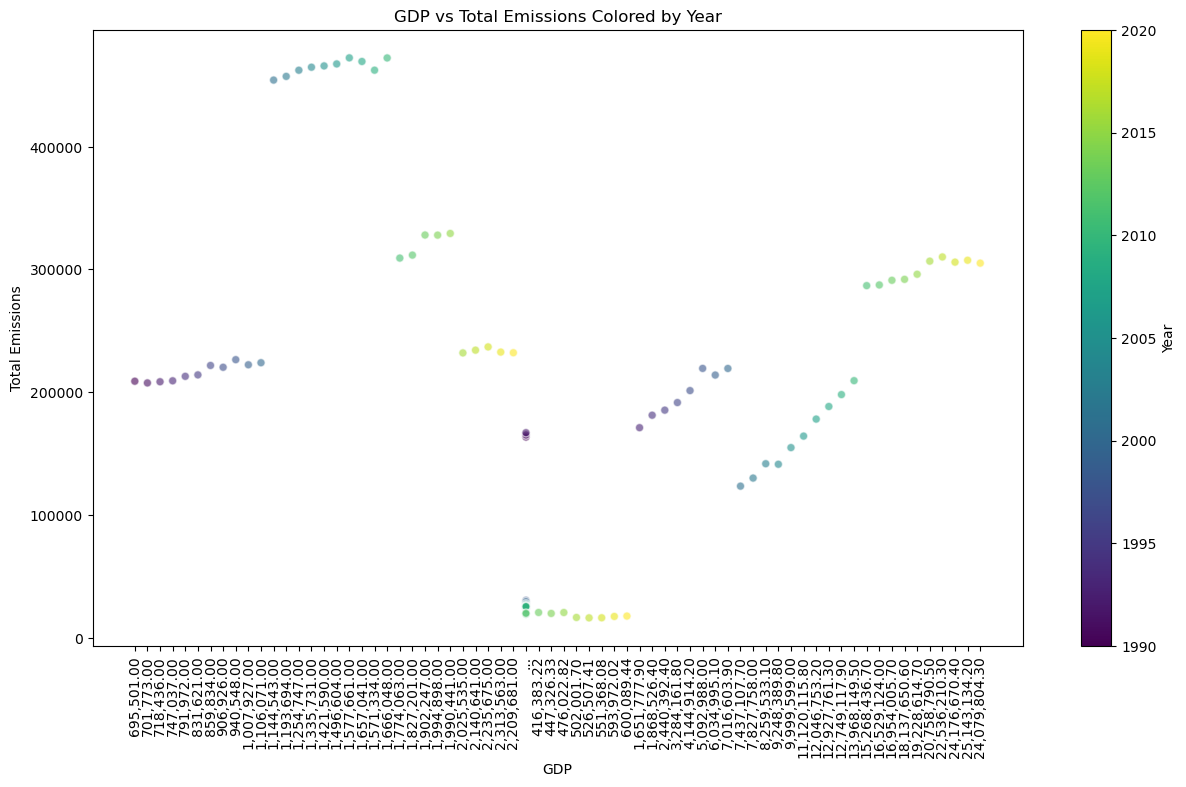

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


merged_data = pd.read_csv('merged_data.csv')

# Create the scatter plot
fig, ax = plt.subplots(figsize=(15, 8))

# Define colormap
years = merged_data['Year'].unique()
years.sort()  # Sort years to align with one-directional colormap
norm = plt.Normalize(years.min(), years.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Scatter plot
scatter = ax.scatter(merged_data['GDP'], merged_data['total_emission'], c=merged_data['Year'], cmap="viridis", alpha=0.6, edgecolors='w')

# Labels and Title
ax.set_xlabel('GDP')
ax.set_ylabel('Total Emissions')
ax.set_title('GDP vs Total Emissions Colored by Year')
plt.xticks(rotation=90)
fig.colorbar(sm, ax=ax, label='Year')

# Show the plot
plt.show()


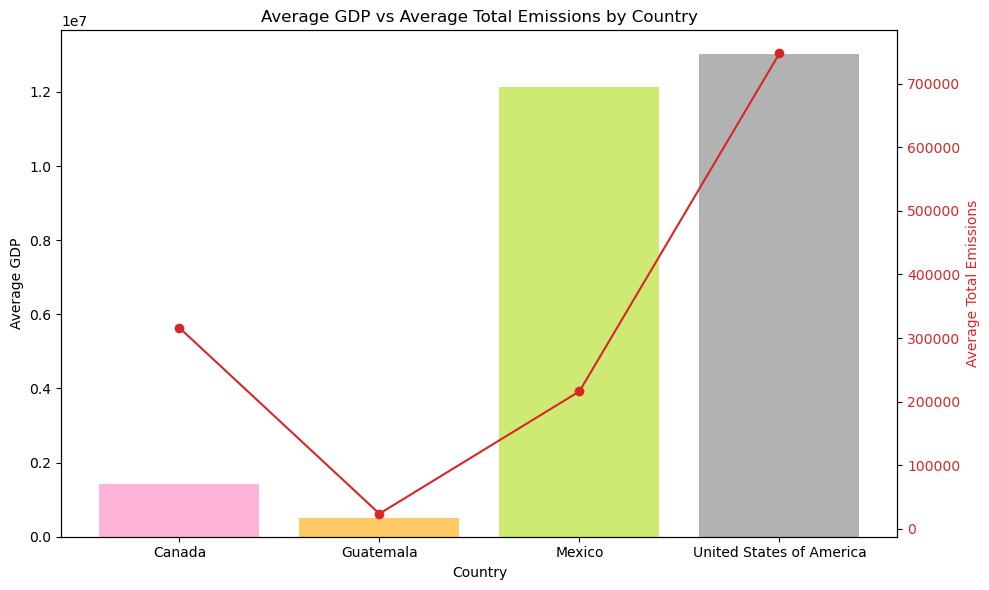

In [79]:
import pandas as pd

# read data
merged_data = pd.read_csv('merged_data.csv')

# Ensure 'GDP' and 'total_emission' are numeric, handling non-numeric characters
merged_data['GDP'] = pd.to_numeric(merged_data['GDP'].str.replace(',', ''), errors='coerce')

# Step 2: Calculate averages
average_data = merged_data.groupby('Area')[['GDP', 'total_emission']].mean()

# define colormap
colors = {"United States": "xkcd:pastel blue", "Mexico": "xkcd:yellowish green", "Canada": "xkcd:pink", "Guatemala": "orange"}

# bar chart 
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting GDP bars
ax1.set_xlabel('Country')
ax1.set_ylabel('Average GDP')
for country in average_data.index:
    ax1.bar(country, average_data.loc[country, 'GDP'], color=colors.get(country, 'grey'), alpha=0.6)

# second axis for total emissions scatter
ax2 = ax1.twinx()
ax2.set_ylabel('Average Total Emissions', color='tab:red')
ax2.plot(average_data.index, average_data['total_emission'], color='tab:red', marker='o', label='Average Total Emissions')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Step 4: Customize the plot
plt.title('Average GDP vs Average Total Emissions by Country')
fig.tight_layout()

# Show the plot
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

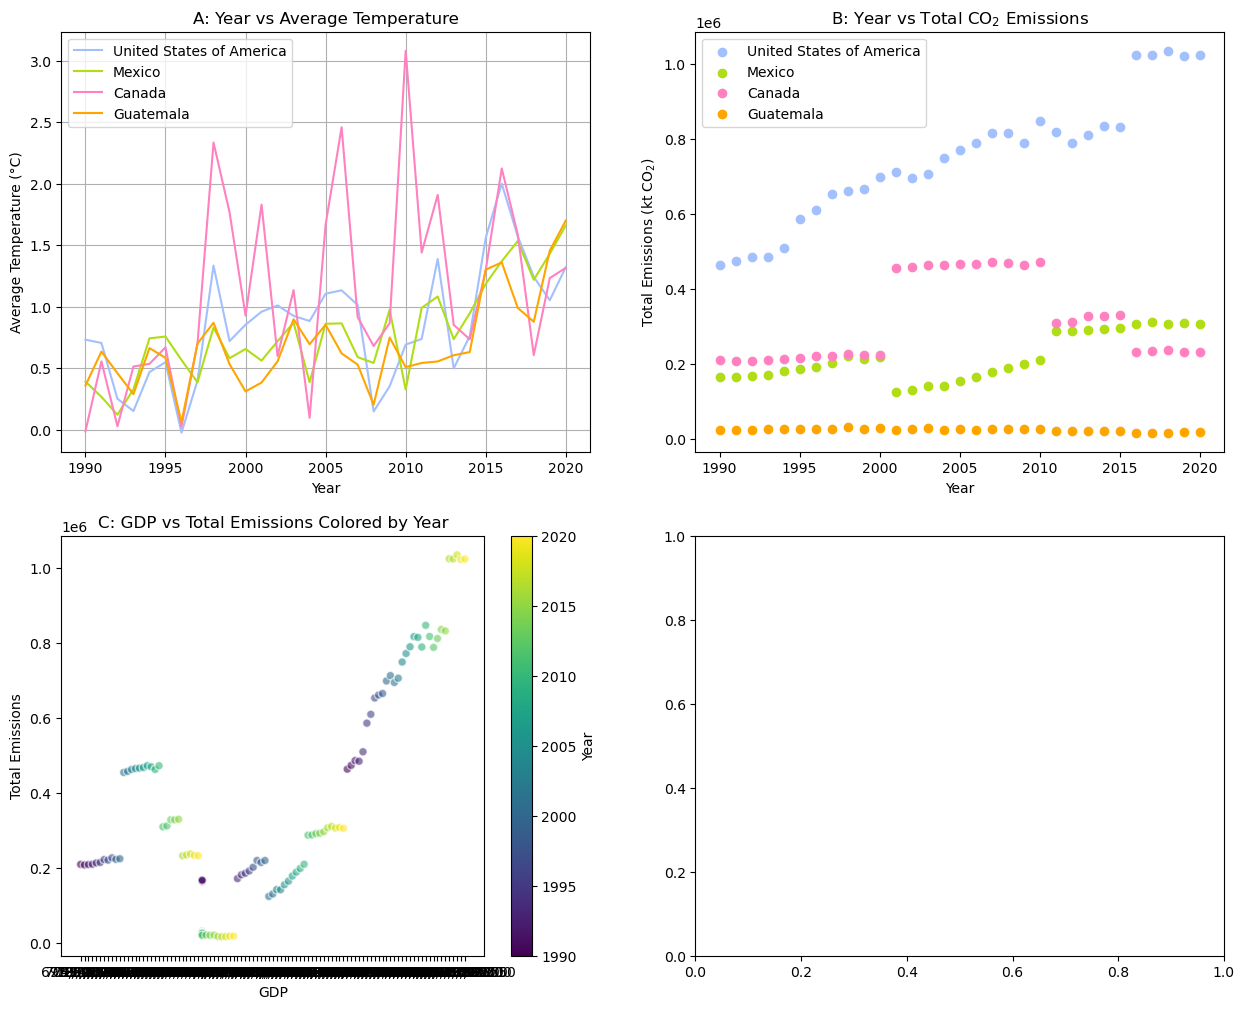

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data here
north_american_df = pd.read_csv('merged_data.csv')
merged_data = pd.read_csv('merged_data.csv')

# Define a color map for the countries
colors = {"United States of America": "xkcd:pastel blue", "Mexico": "xkcd:yellowish green", "Canada": "xkcd:pink", "Guatemala": "orange"}

# Create a 2x2 subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Top Left (A): Line plot of Year vs Average Temperature
for country, color in colors.items():
    country_data = north_american_df[north_american_df['Area'] == country]
    ax1.plot(country_data['Year'], country_data['Average Temperature °C'], label=country, color=color)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)')
ax1.set_title('A: Year vs Average Temperature')
ax1.legend()
ax1.grid(True)

# Top Right (B): Scatter plot of year vs total emissions
for country, color in colors.items():
    country_data = north_american_df[north_american_df['Area'] == country]
    ax2.scatter(country_data['Year'], country_data['total_emission'], label=country, color=color)
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Emissions (kt CO$_2$)')
ax2.set_title('B: Year vs Total CO$_2$ Emissions')
ax2.legend()

# Bottom Left (C): Scatter plot of GDP vs Total emissions
years = merged_data['Year'].unique()
years.sort()  # Sort years to align with the colormap
norm = plt.Normalize(years.min(), years.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
scatter = ax3.scatter(merged_data['GDP'], merged_data['total_emission'], c=merged_data['Year'], cmap="viridis", alpha=0.6, edgecolors='w')
ax3.set_xlabel('GDP')
ax3.set_ylabel('Total Emissions')
ax3.set_title('C: GDP vs Total Emissions Colored by Year')
fig.colorbar(sm, ax=ax3, label='Year')

# Bottom Right (D): Bar Chart of Average GDP vs Average Total Emissions
average_data = merged_data.groupby('Area')[['GDP', 'total_emission']].mean()
for country in average_data.index:
    ax4.bar(country, average_data.loc[country, 'GDP'], color=colors.get(country, 'grey'), alpha=0.6)
ax4.set_xlabel('Country')
ax4.set_ylabel('Average GDP')
ax4.set_title('D: Average GDP vs Average Total Emissions')
ax4.tick_params(axis='y', labelcolor='tab:red')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()
